<a href="https://colab.research.google.com/github/cm5123/Machine-Learning/blob/master/N421_count-based_representation/N421a_Count_based_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [1]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [3]:
df

,Unnamed: 0,title,company,description,url
0,0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
1,1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
2,2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
3,3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
4,4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,https://www.indeed.com/viewjob?jk=422a9c487215...
...,...,...,...,...,...
1295,1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...,https://www.indeed.com/viewjob?jk=cf3a6989c432...
1296,1296,Senior Data Scientist,Takeda Pharmaceuticals,Job Description\nOBJECTIVES:\nEffectively work...,https://www.indeed.com/viewjob?jk=674682157fdf...
1297,1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,https://www.indeed.com/viewjob?jk=4e38a8dddb16...
1298,1298,Senior Data Scientist,Cox Automotive,"Cox Automotive, a subsidiary of Cox Enterprise...",https://www.indeed.com/viewjob?jk=ddef07b8b441...


In [4]:
df=df.drop(['url'],axis=1)

In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df = df.drop_duplicates()

In [7]:
df

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell..."
...,...,...,...
1288,Senior Data Analyst,Intuit,Our Expert Delivery & Business Intelligence te...
1294,"Senior / Data Scientist, Advertising Business",Spotify,"Music for everyone, no credit card needed. It’..."
1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...


### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [8]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [9]:
def tokenize(text):
    """text 문자열을 의미있는 단어 단위로 list에 저장합니다.
    Args:
        text (str): 토큰화 할 문자열
    Returns:
        list: 토큰이 저장된 리스트
    """
    # 정규식 적용
    regex=regex = r"[^a-zA-Z0-9\n ]"
    subst=""
    tokens = re.sub(regex, subst, text)
    # 소문자로 치환
    tokens = tokens.lower().split()
    
    return tokens

In [10]:
df['tokens'] = df['description'].apply(tokenize)

In [11]:
df

,title,company,description,tokens
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,"[job, details, description, essential, duties,..."
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,"[as, a, team, member, in, the, finance, and, i..."
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,"[overview, american, credit, acceptance, seeks..."
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...,"[jp, morgans, corporate, investment, bank, cib..."
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...","[at, vystar, we, offer, competitive, pay, an, ..."
...,...,...,...,...
1288,Senior Data Analyst,Intuit,Our Expert Delivery & Business Intelligence te...,"[our, expert, delivery, business, intelligence..."
1294,"Senior / Data Scientist, Advertising Business",Spotify,"Music for everyone, no credit card needed. It’...","[music, for, everyone, no, credit, card, neede..."
1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...,"[senior, data, applied, scientist, do, you, ha..."
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,"[ebay, is, a, global, commerce, leader, that, ..."


### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [12]:
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 합니다. 
df['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열합니다
word_counts.most_common(10)

[('and', 21863),
 ('to', 12694),
 ('the', 10538),
 ('of', 8839),
 ('data', 7425),
 ('in', 6769),
 ('a', 6436),
 ('with', 5727),
 ('for', 4132),
 ('or', 3812)]

In [13]:
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [14]:
wc = word_count(df['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
180,and,755,21863,1.0,0.056454,0.056454,0.997358
132,to,754,12694,2.0,0.032778,0.089231,0.996037
53,the,745,10538,3.0,0.027211,0.116442,0.984148
112,of,745,8839,4.0,0.022824,0.139266,0.984148
150,data,740,7425,5.0,0.019172,0.158438,0.977543


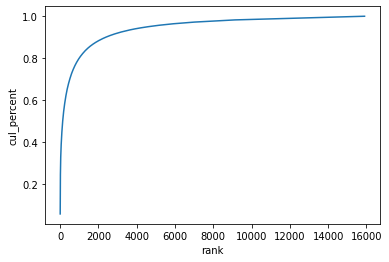

In [15]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [16]:
print(nlp.Defaults.stop_words)

{'would', 'herself', 'what', 'you', 'could', 'under', 'nevertheless', 'becomes', 'might', 'anything', 'an', 'always', 'the', 'next', 'without', 'had', 'only', 'n’t', 'used', "n't", 'until', 'whatever', 'when', 'why', 'with', 'as', 'hers', 'eleven', 'anyhow', 'upon', 'perhaps', 'whereas', "'s", 'regarding', 'since', 'ever', '‘re', 'eight', 'this', 'either', 'or', 'sometime', 'at', 'once', 'see', 'every', 'afterwards', '’d', 'below', 'whereby', 'put', 'therein', 'anyway', 'cannot', 'front', 'say', 'most', 'were', 'though', 'per', 'much', 'own', "'ve", 'how', 'third', 'them', 'itself', 'least', 'before', 'make', 'still', 'really', 'go', 'more', 'latterly', 'between', 'many', 'is', 'into', 'must', 'yourselves', 'full', 'his', 'made', 'keep', 'nine', 'across', 'beyond', 'namely', 'show', 'they', 'someone', 'after', 'within', 'doing', 'via', 'rather', 'whether', 'me', '’ve', 'part', 'thereby', 'up', 'that', 'seemed', 'has', 'although', 'however', 'give', 'another', 'get', 'none', 'formerly',

In [17]:
STOP_WORDS = nlp.Defaults.stop_words.union(['data','work'])

In [18]:
tokens = []

for doc in df['tokens']:
    
    doc_tokens = []
    
    for token in doc: 
        if token not in STOP_WORDS:
            doc_tokens.append(token)
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [19]:
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 합니다. 
df['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열합니다
word_counts.most_common(10)

[('experience', 3450),
 ('business', 2064),
 ('science', 1648),
 ('team', 1625),
 ('learning', 1596),
 ('analysis', 1349),
 ('skills', 1251),
 ('machine', 1152),
 ('analytics', 1136),
 ('models', 1034)]

### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [20]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

tokens = []
for doc in df['tokens']:
    doc_tokens = []
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df['stems'] = tokens

In [21]:
!pip install squarify

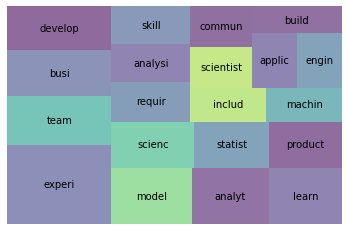

In [22]:
import squarify
import matplotlib.pyplot as plt
wc = word_count(df['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 9) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
dtm_tfidf = tfidf.fit_transform(df['description'])

dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())
dtm_tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,100,11,12,14,15,18,19,20,200,2017,2018,2019,2020,22,24,25,30,300,31,35,3m,40,400,401,401k,50,500,5000,60,600,75,80,90,aa,ab,abilities,ability,...,wellness,whip,wholly,wi,wide,widely,wildlife,willing,willingness,winning,women,word,work,workday,worked,worker,workers,workflow,workflows,workforce,working,workplace,workplaces,works,world,worldwide,wrangling,wri,write,writing,written,www,year,years,yelp,yes,york,yrs,zillow,zulily
0,0.0,0.000000,0.05272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058637,0.052353,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.069356,0.0,0.0,0.000000,0.062315,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.051677,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.023379,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.072438,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031375,0.027418,0.0,0.0,0.000000,0.098541,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.071503,0.000000,0.0,0.000000,0.012252,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.018485,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058743,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.062152,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.058510,0.000000,0.000000,0.017488,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.033337,0.00000,0.035082,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.042929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043708,...,0.000000,0.0,0.0,0.0,0.053924,0.000000,0.0,0.000000,0.038602,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.038116,0.000000,0.000000,0.0,0.030795,0.103499,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060084,0.013012,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.027691,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030387,0.0,0.0,0.0,0.0,0.0,0.0,0.030644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023711,0.010585,...,0.000000,0.0,0.0,0.0,0.019588,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.028417,0.067195,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020896,0.000000,0.0,0.044746,0.000000,0.000000,0.0,0.0,0.0,0.021826,0.000000,0.000000,0.000000,0.047268,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
753,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020719,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.082207,0.0,0.065596,0.0,0.0,0.0,0.0,0.000000,0.000000,0.046606,0.0,0.000000,0.098124,0.05

In [24]:
from sklearn.neighbors import NearestNeighbors

# dtm을 사용히 NN 모델을 학습시킵니다. (디폴트)최근접 5 이웃.
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='kd_tree')

In [25]:
nn.kneighbors([dtm_tfidf.iloc[88]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


(array([[0.        , 1.1283426 , 1.18893646, 1.19442548, 1.19937307]]),
 array([[ 88,  40, 121,  68, 680]]))

## 3. TF-IDF 이용한 텍스트 분류 진행하기

TF-IDF를 이용해 문장 혹은 문서를 벡터화한 경우, 이 벡터값을 이용해 문서 분류 태스크를 진행할 수 있습니다. 

현재 다루고 있는 데이터셋에는 label이 존재하지 않으므로, title 컬럼에 "Senior"가 있는지 없는지 여부를 통해 Senior 직무 여부를 분류하는 작업을 진행해보겠습니다.

### 1) title 컬럼에 "Senior" 문자열이 있으면 1, 없으면 0인 "Senior"라는 새로운 컬럼을 생성해주세요.

문항 7) 새롭게 만든 Senior 컬럼에서 값이 1인 (Senior O) 데이터의 개수는?

In [26]:
df['Senior'] = df['title'].apply(lambda x: 1 if 'Senior' in x else 0)

In [27]:
df

,title,company,description,tokens,stems,Senior
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,"[job, details, description, essential, duties,...","[job, detail, descript, essenti, duti, respons...",0
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,"[team, member, finance, internal, audit, depar...","[team, member, financ, intern, audit, depart, ...",0
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,"[overview, american, credit, acceptance, seeks...","[overview, american, credit, accept, seek, hig...",0
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...,"[jp, morgans, corporate, investment, bank, cib...","[jp, morgan, corpor, invest, bank, cib, global...",0
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...","[vystar, offer, competitive, pay, excellent, b...","[vystar, offer, competit, pay, excel, benefit,...",0
...,...,...,...,...,...,...
1288,Senior Data Analyst,Intuit,Our Expert Delivery & Business Intelligence te...,"[expert, delivery, business, intelligence, tea...","[expert, deliveri, busi, intellig, team, small...",1
1294,"Senior / Data Scientist, Advertising Business",Spotify,"Music for everyone, no credit card needed. It’...","[music, credit, card, needed, promise, platfor...","[music, credit, card, need, promis, platform, ...",1
1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...,"[senior, applied, scientist, passion, machine,...","[senior, appli, scientist, passion, machin, le...",1
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,"[ebay, global, commerce, leader, allows, shape...","[ebay, global, commerc, leader, allow, shape, ...",1


In [28]:
df['Senior'].value_counts()

0    662
1     95
Name: Senior, dtype: int64

문항 8) sklearn의 `train_test_split`을 통해 train 데이터와 valid 데이터로 나눈 후, `sklearn`의 `DecisionTreeClassifier`를 이용해 분류를 진행해주세요. 

단, x값은 위에서 학습한 dtm_tfidf를 그대로 이용해주세요. train_test_split과 DecisionTreeClassifier의 random_state을 42로 고정하고, test_size는 0.1로 설정해주세요.

학습을 완료한 후, test 데이터에 대한 예측을 진행하고 label 1에 대한 precision과 recall 값을 적어주세요

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(dtm_tfidf,
                                                  df['Senior'], 
                                                  test_size = 0.1, 
                                                  random_state=42)

In [31]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        68
           1       0.27      0.50      0.35         8

    accuracy                           0.80        76
   macro avg       0.60      0.67      0.62        76
weighted avg       0.86      0.80      0.83        76

